datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. 
* The second Covid-19 dataset reports the total number of recovered patients for each country at the end of each day. 

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/cases_feb_21.csv',
    index_col=0,
    thousands=','
)

In [ ]:
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1521,1531,1536,1537,1537,1539,1540,1544,1546,1548,1548,1548,1549,1551,1553,1651,1657,1767,1817,1850,1882,1948,1957,1976,1985,2001,2050,2064,2091,2140,2142,2195,2228,2269,2311,2329,2347,2362,2368,2383
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,149769,150505,151142,151569,152031,152555,153093,153590,154063,154557,155006,155414,155884,156393,156996,157593,158168,158559,158962,159443,159956,160426,161087,161559,162029,162601,163213,163975,164736,165535,166200,166800,167604,168444,169487,170527,171154,171717,172315,173635
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2109,2110,2111,2112,2112,2113,2115,2115,2115,2118,2118,2118,2118,2119,2120,2120,2120,2120,2121,2122,2122,2122,2122,2124,2127,2127,2131,2131,2133,2134,2136,2136,2145,2145,2148,2151,2154,2157,2157,2165
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31100,32800,34278,3607

Plot the time-series for 6 countries. Then the data was standardized such that each day has a `mean` of zero and a `StD` of 1. Then the standardized data was plotted.

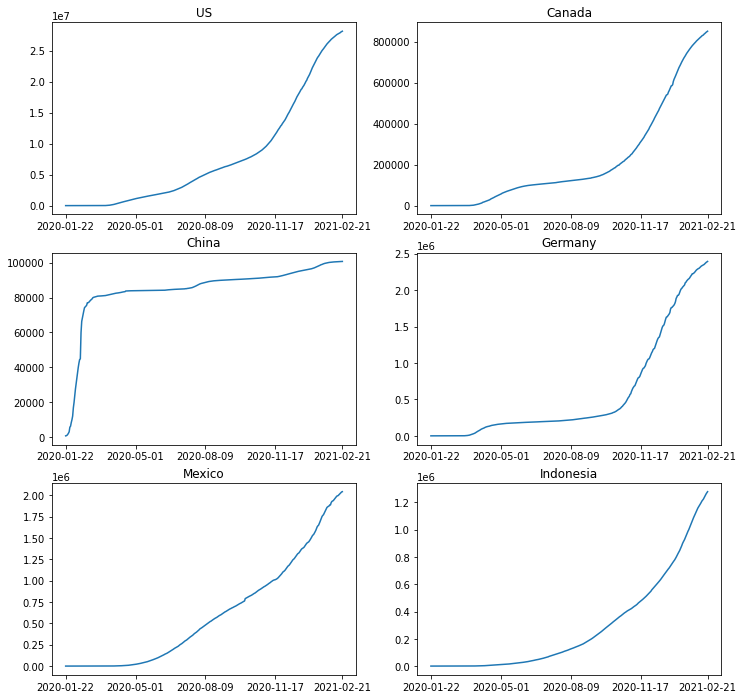

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2, figsize=(12,12))
nameofcountries=['US','Canada','China','Germany','Mexico','Indonesia']
for j in range(6):
  axes.flat[j].plot(cases_raw.columns,cases_raw.loc[nameofcountries[j]])
  axes.flat[j].set_title(nameofcountries[j])
  my_xticks = axes.flat[j].get_xticks()
  axes.flat[j].set_xticks([my_xticks[0],my_xticks[100],my_xticks[200],my_xticks[300],my_xticks[396]]) 

In [ ]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
X_std = scale.fit_transform(cases_raw)
X=cases_raw.iloc[:,0:397].values

In [ ]:
X[:, 3].mean(), X_std[:, 3].mean()

(7.463541666666667, -2.7755575615628914e-17)

In [ ]:
X[:, 0].var(), X_std[:, 0].var()

(1555.7870822482646, 1.0)

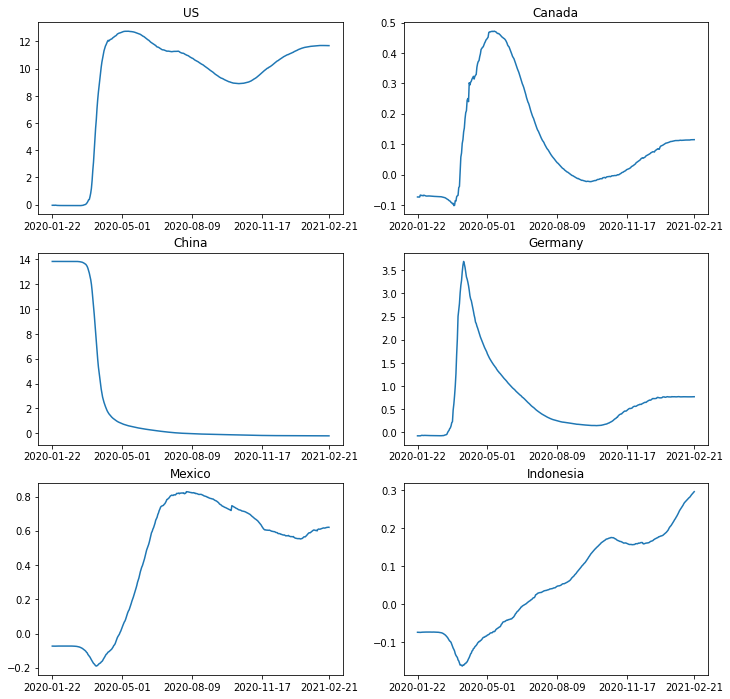

In [ ]:
Standard=pd.DataFrame(data=X_std,index=cases_raw.index)
fig1, axes1 = plt.subplots(3,2, figsize=(12,12))
for a in range(6):
  axes1.flat[a].plot(cases_raw.columns,Standard.loc[nameofcountries[a]])
  axes1.flat[a].set_title(nameofcountries[a])
  my_xticks = axes1.flat[a].get_xticks()
  axes1.flat[a].set_xticks([my_xticks[0],my_xticks[100],my_xticks[200],my_xticks[300],my_xticks[396]]) 

The standardized data captured the differences of each country's change in the original data, as it has been centered, scaled and transformed. Therefore, instead of the absolute number of cases, the standardized data shows the differences of the speed of each country's cases' increment. 

For example, the US' plot has a sharp upward trend at the beginning, which means the US had experienced a very sharp increase in the number of cases compared to other countries around the same time; Canada's plot around the same dates showed a downward trend and reaching negative values, however, which indicates that again, in comparison to many countries other than Canada within the same period, Canada may have some of the lowest growths in daily reported cases (lower than the mean daily values).

The US and Canada's time-series plots demonstrate similar trends with different amplitudes where after the first sudden soar, the standardized data sported a decreasing trend before going back up again. That means both countries had a slowing down in virus cases based on the global mean.

Whereas China, as the epicenter of COVID, the country's standardized plot had maintained a very high value of around 14 for the first 50 days or so, which corresponds to the relatively fewer cases reported in other countries. Then the standardized data for China shows a sharp drop in the plot and then stayed low for the rest of the time presumably due to the virus spreading to other countries and the strict countermeasures taken in order to slow down the spread of COVID-19.

##PCA

In [ ]:
n,d= X_std.shape
C = np.dot(X_std.T,X_std) / (n-1) 
eigenValues, eigenVectors = np.linalg.eigh(C)

In [ ]:
C.shape

(397, 397)

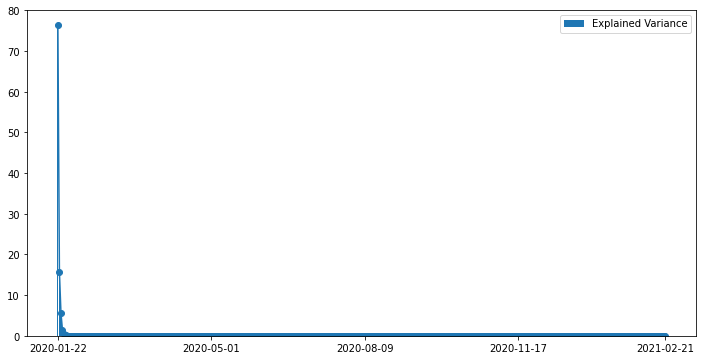

In [ ]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
plt.figure(figsize=(12,6))
plt.bar(cases_raw.columns, expVar, label='Explained Variance')
plt.plot(cases_raw.columns, expVar,'-o')
plt.xticks([cases_raw.columns[0],cases_raw.columns[100],cases_raw.columns[200],cases_raw.columns[300],cases_raw.columns[396]])
plt.legend()
plt.show()

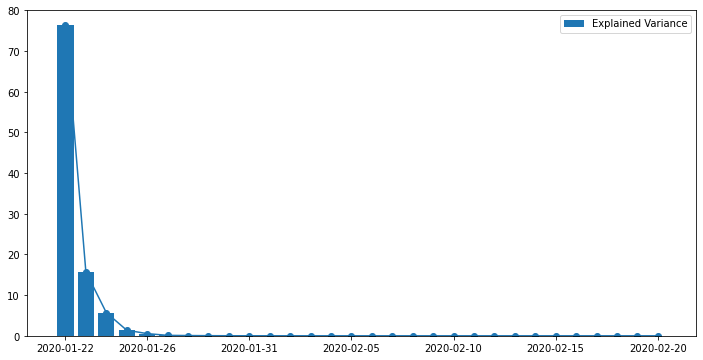

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(cases_raw.columns[0:30], expVar[0:30], label='Explained Variance')
plt.plot(cases_raw.columns[0:30], expVar[0:30],'-o')
plt.xticks([cases_raw.columns[0],cases_raw.columns[4],cases_raw.columns[9],cases_raw.columns[14],cases_raw.columns[19],cases_raw.columns[24],cases_raw.columns[29]])
plt.legend()
plt.show()

In [ ]:
cumExpVar = np.cumsum(expVar) #how many PCs needed to cover 99% of the variance
for i in range(397):
  if cumExpVar[i]>99:
    break
print("Number of PCs:",i+1)

Number of PCs: 4


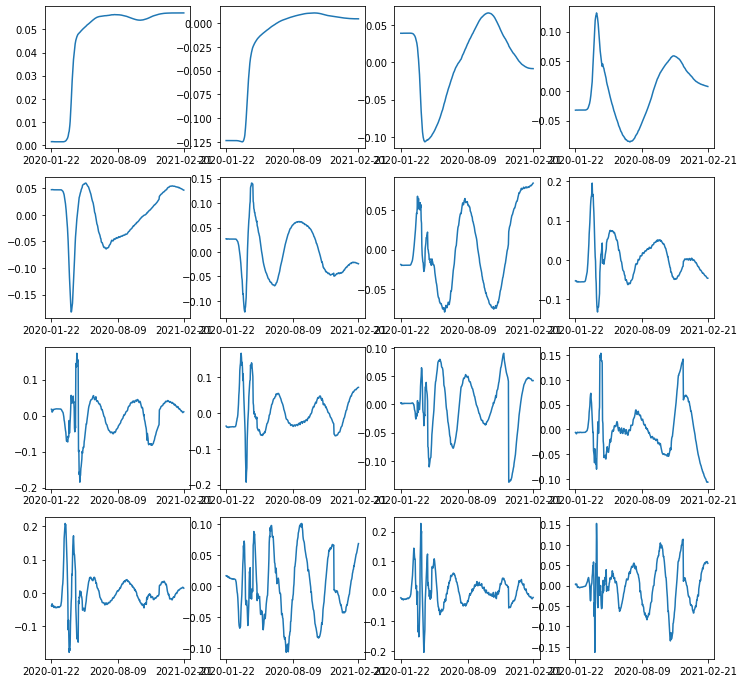

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(12,12))

for col in range(16):
    ax.flat[col].plot(cases_raw.columns,eigenVectors[:,col])
    my_xticks = ax.flat[col].get_xticks()
    ax.flat[col].set_xticks([my_xticks[0],my_xticks[200],my_xticks[396]]) 

## Demo on Data reconstruction

In [ ]:
def recon(X, eigenV, original_data, std_pd, sle):
  plt.plot(original_data.columns,original_data.loc[X])
  plt.title(X)
  plt.xticks([original_data.columns[0],original_data.columns[100],original_data.columns[200],original_data.columns[300],original_data.columns[396]])
  plt.show()
  plt.plot(original_data.columns,std_pd.loc[X])
  plt.title(X)
  plt.xticks([original_data.columns[0],original_data.columns[100],original_data.columns[200],original_data.columns[300],original_data.columns[396]])
  plt.show()
#above code plots the original and standardized time-series of the input country

  #reconstruction with PC1:
  W1 = eigenV[:,0:1]
  proj1 = np.dot(np.array(std_pd.loc[X]), W1)
  Recon1 = np.dot(proj1, W1.T)
  X_rescale1=sle.inverse_transform(Recon1)
 
  #reconstruction with PC1-2:
  W2 = eigenV[:,0:2]
  proj2 = np.dot(np.array(std_pd.loc[X]), W2)
  Recon2 = np.dot(proj2, W2.T)
  X_rescale2=sle.inverse_transform(Recon2)

  #recon with pc1-4:
  W3 = eigenV[:,0:4]
  proj3 = np.dot(np.array(std_pd.loc[X]), W3)
  Recon3 = np.dot(proj3, W3.T)
  X_rescale3=sle.inverse_transform(Recon3)

  #recon with pc1-8:
  W4 = eigenV[:,0:8]
  proj4 = np.dot(np.array(std_pd.loc[X]), W4)
  Recon4 = np.dot(proj4, W4.T)
  X_rescale4=sle.inverse_transform(Recon4)
  
  #recon with pc1-16:
  W5 = eigenV[:,0:16]
  proj5 = np.dot(np.array(std_pd.loc[X]), W5)
  Recon5 = np.dot(proj5, W5.T)
  X_rescale5=sle.inverse_transform(Recon5)
  
  plt.figure(figsize=(12,6))
  plt.plot(original_data.columns,X_rescale1,label='PC1')
  plt.plot(original_data.columns,X_rescale2,label='PC1-2')
  plt.plot(original_data.columns,X_rescale3,label='PC1-4')
  plt.plot(original_data.columns,X_rescale4,label='PC1-8')
  plt.plot(original_data.columns,X_rescale5,label='PC1-16')
  plt.legend(loc="upper left")
  plt.xticks([original_data.columns[0],original_data.columns[100],original_data.columns[200],original_data.columns[300],original_data.columns[396]])
  plt.show()

  #residual error:
  residuals1 = [original_data.loc[X][i]-X_rescale1[i] for i in range(397)]
  plt.figure(figsize=(12,6))
  plt.plot(original_data.columns,residuals1,label='PC1')
  residuals2 = [original_data.loc[X][i]-X_rescale2[i] for i in range(397)]
  plt.plot(original_data.columns,residuals2,label='PC1-2')
  residuals3 = [original_data.loc[X][i]-X_rescale3[i] for i in range(397)]
  plt.plot(original_data.columns,residuals3,label='PC1-4')
  residuals4 = [original_data.loc[X][i]-X_rescale4[i] for i in range(397)]
  plt.plot(original_data.columns,residuals4,label='PC1-8')
  residuals5 = [original_data.loc[X][i]-X_rescale5[i] for i in range(397)]
  plt.plot(original_data.columns,residuals5,label='PC1-16')
  plt.legend(loc="upper left")
  plt.xticks([original_data.columns[0],original_data.columns[100],original_data.columns[200],original_data.columns[300],original_data.columns[396]])
  plt.show()

  #RMSE:
  rmse=[]
  for i in range(1,51):
    W=eigenV[:,0:i]
    proj=np.dot(np.array(std_pd.loc[X]), W)
    Recon = np.dot(proj, W.T)
    X_rescale=sle.inverse_transform(Recon)
    residuals = [original_data.loc[X][j]-X_rescale[j] for j in range(397)]
    RMSE_loop=np.sqrt((np.array(residuals)**2).mean())
    rmse.append(RMSE_loop)
  plt.plot(np.arange(1,51),rmse)

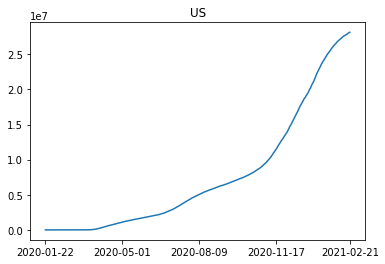

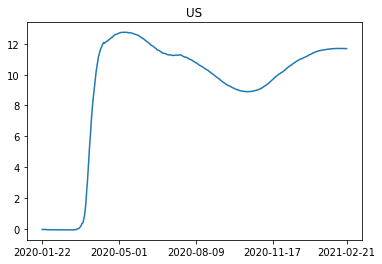

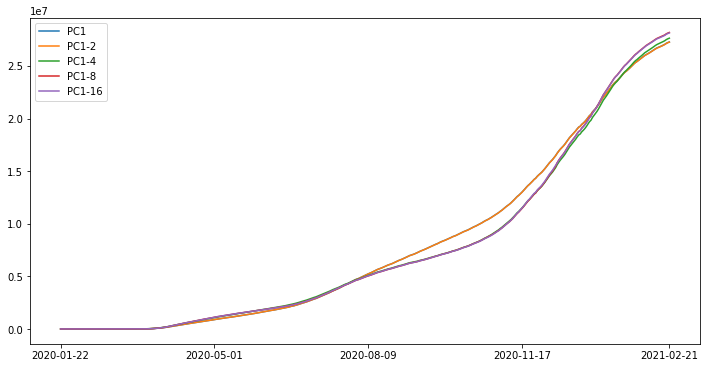

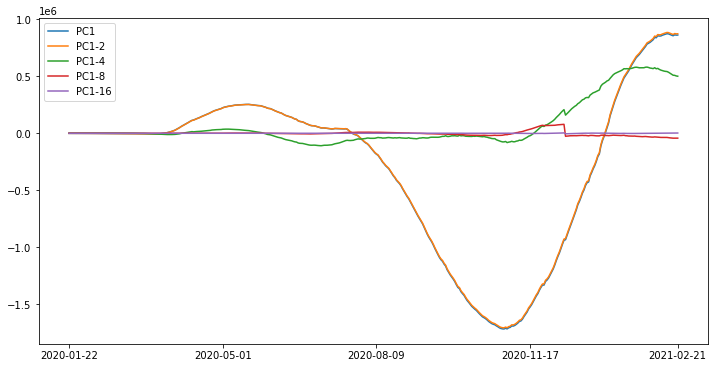

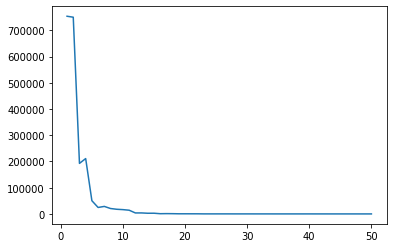

In [ ]:
recon('US', eigenVectors, cases_raw, Standard, scale)

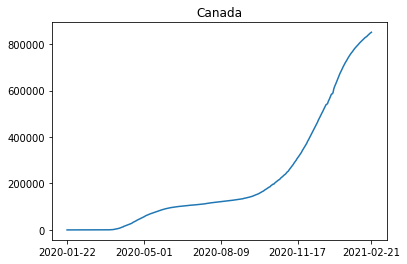

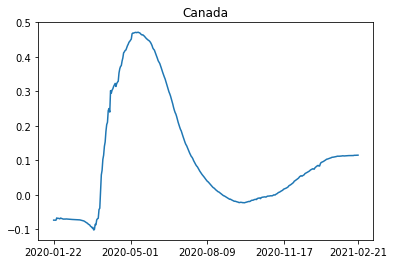

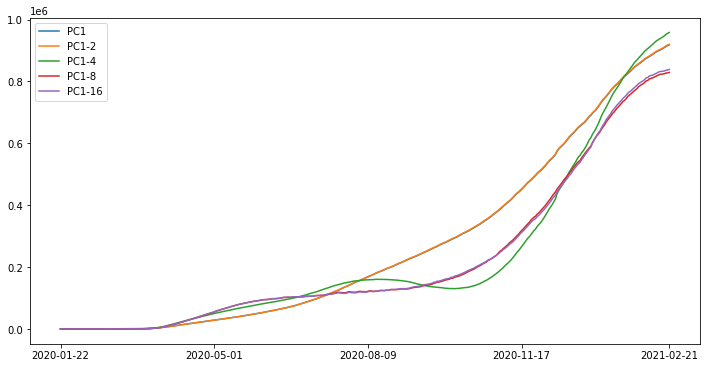

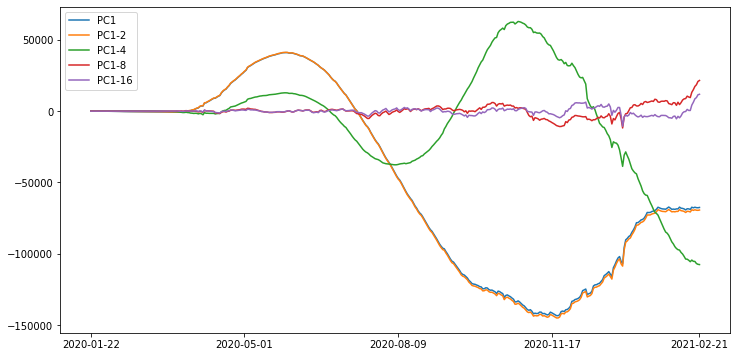

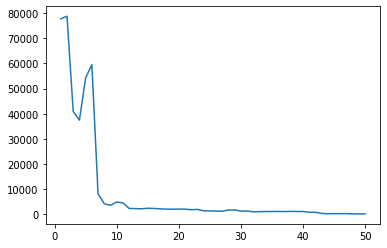

In [ ]:
recon('Canada', eigenVectors, cases_raw, Standard, scale)

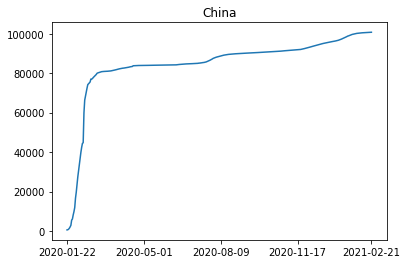

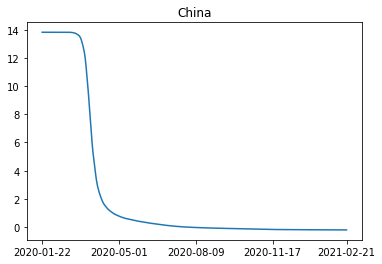

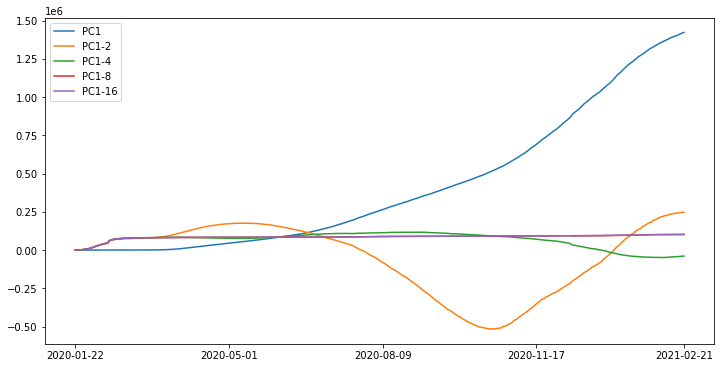

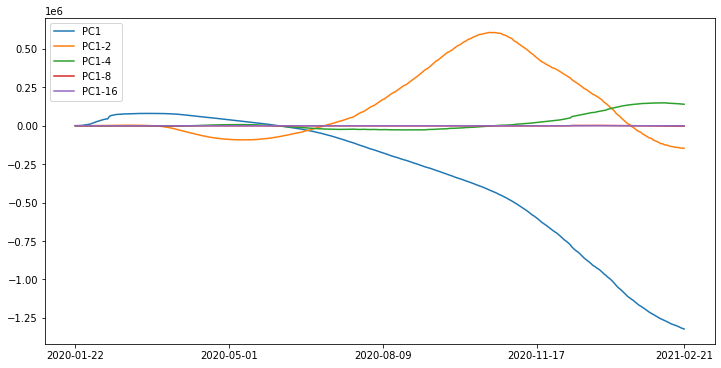

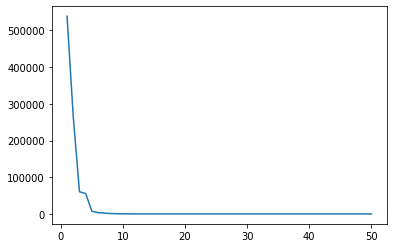

In [ ]:
recon('China', eigenVectors, cases_raw, Standard, scale)

##Time-series analysis on recovered cases

In [ ]:
import pandas as pd
recovered_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/recoverd_feb_21.csv',
    index_col=0,
    thousands=','
)

In [ ]:
recovered_raw.loc['US'][326:397]

2020-12-13    6298082
2020-12-14          0
2020-12-15          0
2020-12-16          0
2020-12-17          0
               ...   
2021-02-17          0
2021-02-18          0
2021-02-19          0
2021-02-20          0
2021-02-21          0
Name: US, Length: 71, dtype: int64

In [ ]:
for i in range(327,397):
  recovered_raw.loc['US'][i]=recovered_raw.loc['US'][326]

Fill the zeros in US' data with the highest value.


In [ ]:
scale1= StandardScaler()
R_std = scale1.fit_transform(recovered_raw) 

In [ ]:
Recovered=pd.DataFrame(data=R_std,index=recovered_raw.index)
n1,d1= R_std.shape
C1 = np.dot(R_std.T,R_std) / (n1-1)
eigenValues1, eigenVectors1 = np.linalg.eigh(C1)

In [ ]:
args1 = (-eigenValues1).argsort()
eigenValues1 = eigenValues1[args1]
eigenVectors1 = eigenVectors1[:, args1]

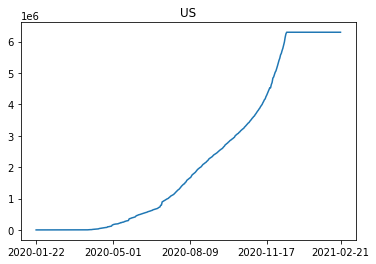

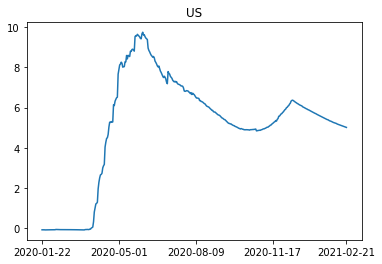

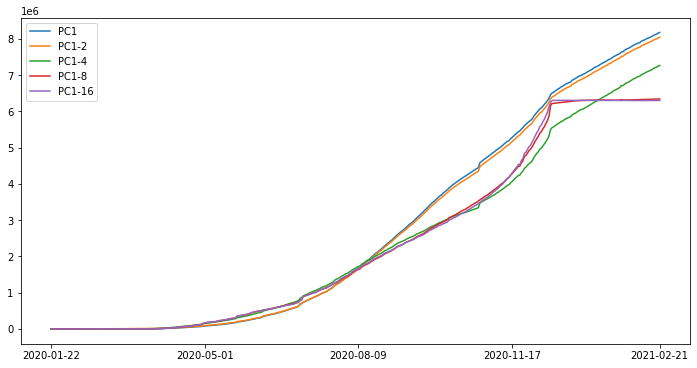

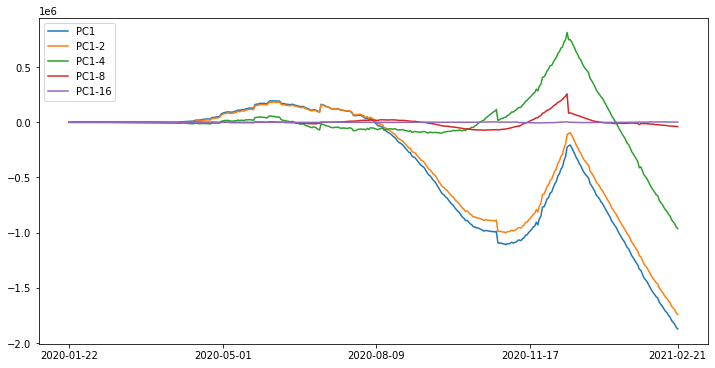

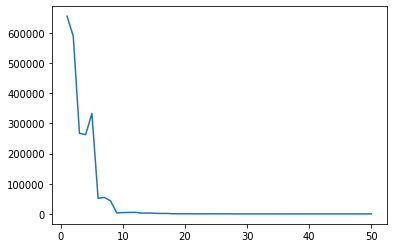

In [ ]:
recon('US', eigenVectors1, recovered_raw, Recovered, scale1) #call the same function

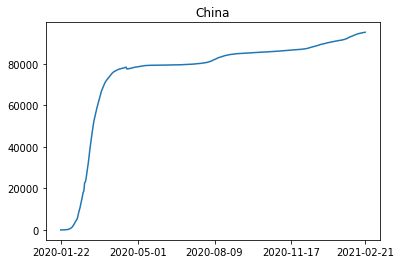

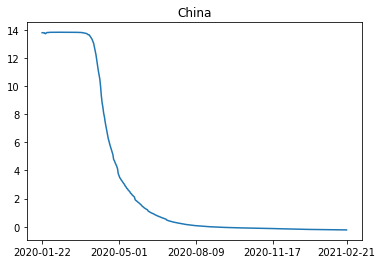

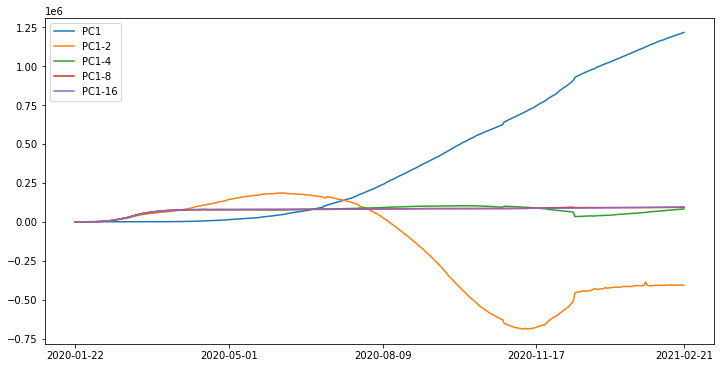

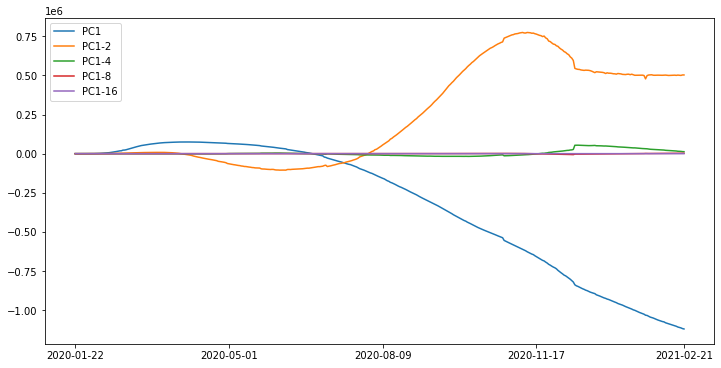

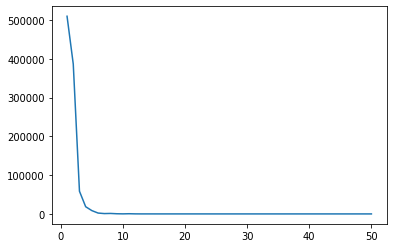

In [ ]:
recon('China', eigenVectors1, recovered_raw, Recovered, scale1)

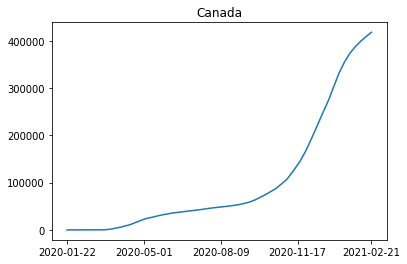

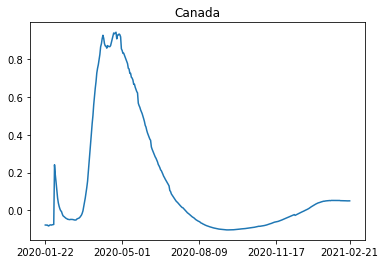

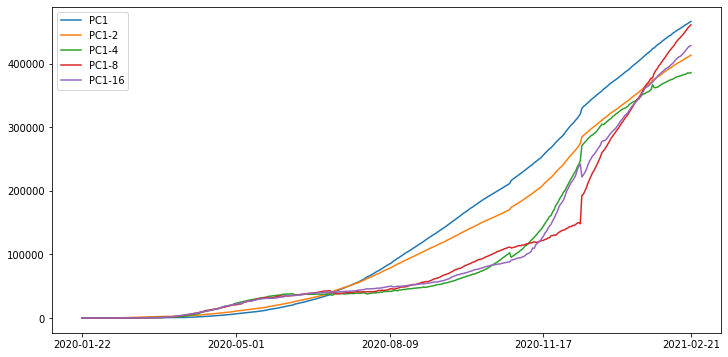

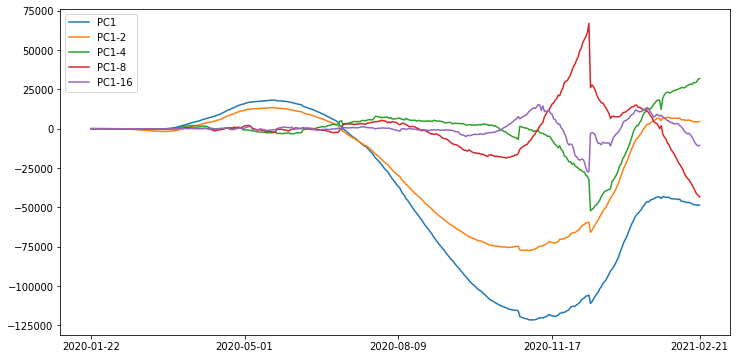

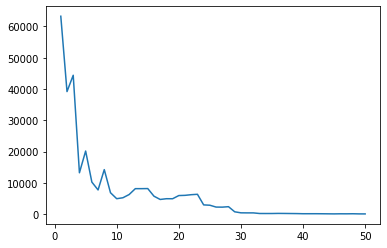

In [ ]:
recon('Canada', eigenVectors1, recovered_raw, Recovered, scale1)

##PCA on the dimension of the samples
Since the number of features (dates) in the dataset is greater than the number of samples (countries), apply PCA on the sample dimension for faster computation. 

In [ ]:
C2 = np.dot(R_std,R_std.T) / (n1-1)
eigenValues2, eigenVectors2 = np.linalg.eigh(C2)
eigenVectors2 = np.dot(R_std.T,eigenVectors2)
for i in range(n1):
  eigenVectors2[:,i] = eigenVectors2[:, i] / np.linalg.norm(eigenVectors2[:, i])
args2 = (-eigenValues2).argsort()
eigenValues2 = eigenValues2[args2]
eigenVectors2 = eigenVectors2[:, args2]

In [ ]:
eigenVectors2.shape

(397, 192)

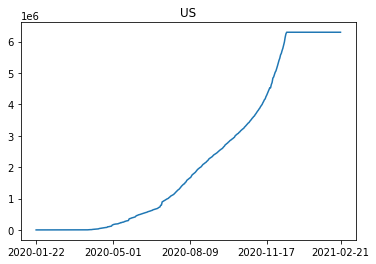

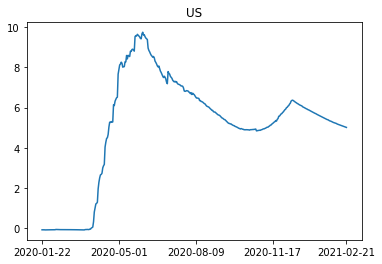

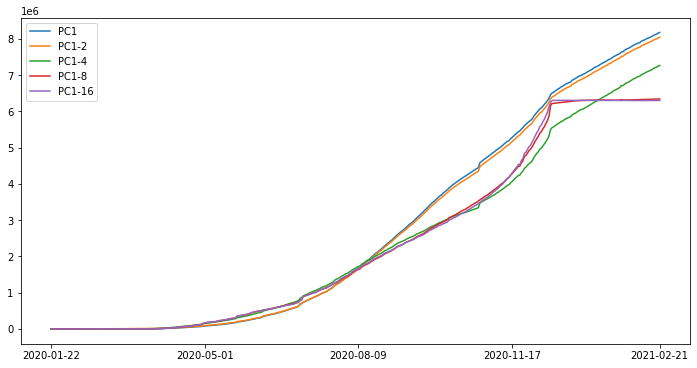

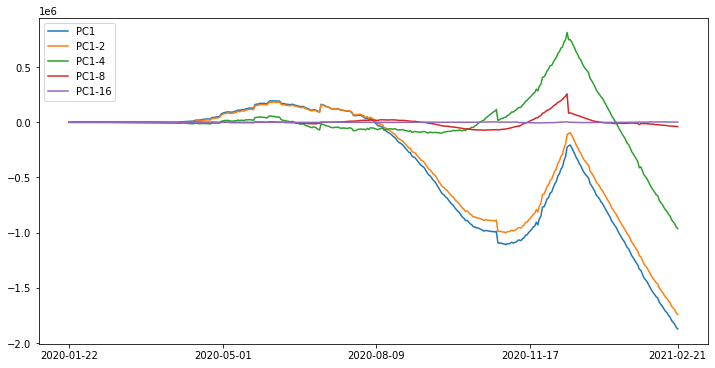

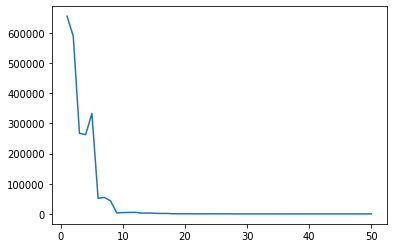

In [ ]:
recon('US', eigenVectors2, recovered_raw, Recovered, scale1)

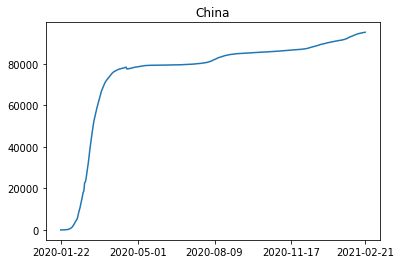

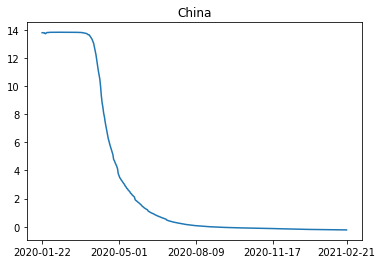

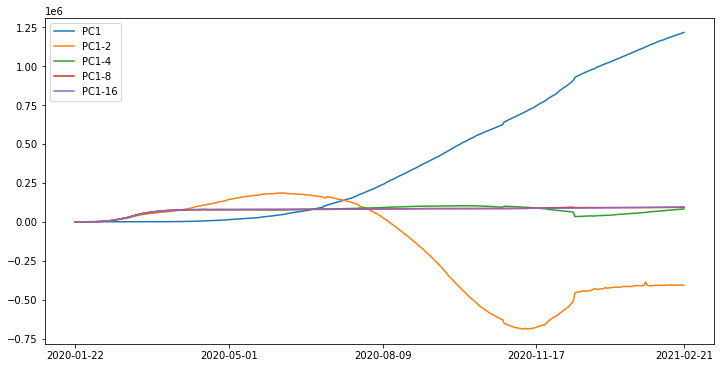

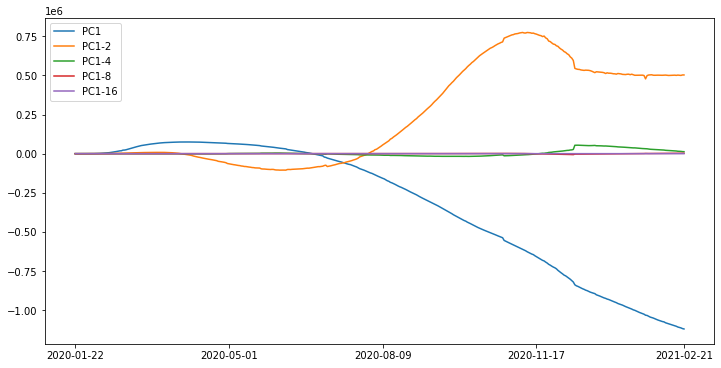

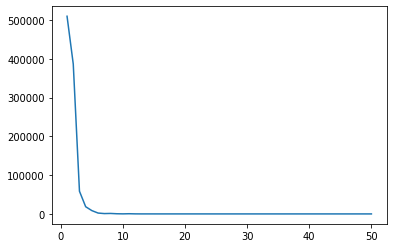

In [ ]:
recon('China', eigenVectors2, recovered_raw, Recovered, scale1)

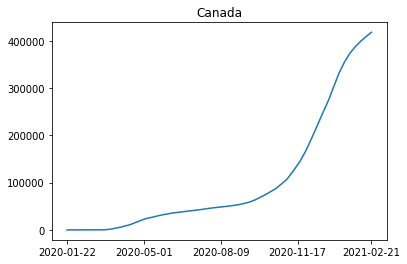

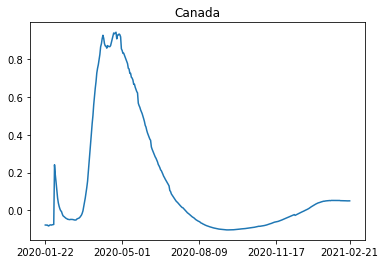

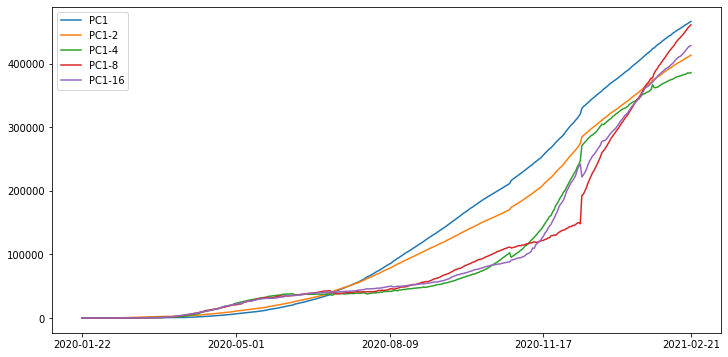

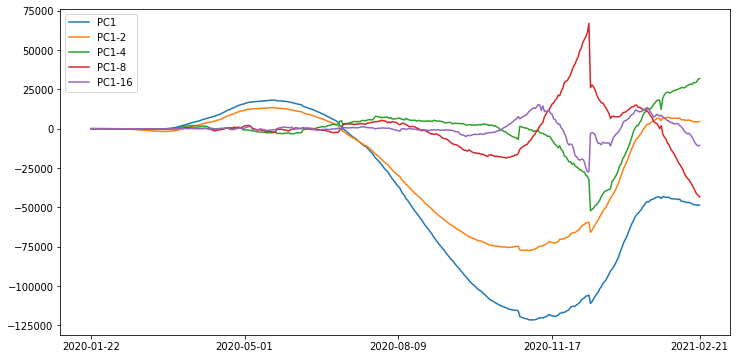

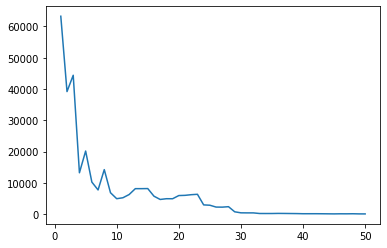

In [ ]:
recon('Canada', eigenVectors2, recovered_raw, Recovered, scale1)

With the matrix in sample size, the plots remain similar to the part prior where we used all features in PCA. This could mean that all features are not necessary in the PCA of recovered cases' analysis, and that it wouldn't compromise the principal components' ability to summarize the data. In other words, some features are potentially related so that they could be represented by much fewer components.


# References

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


